In [1]:
from GridPythonModule import *

## Grid diagrams
A grid diagram is a NxN square grid, with two sets of markings (X and O), obeying a "sudoku" rule: exactly one marking of each kind for each row/column, and at most one in each little square. Example:

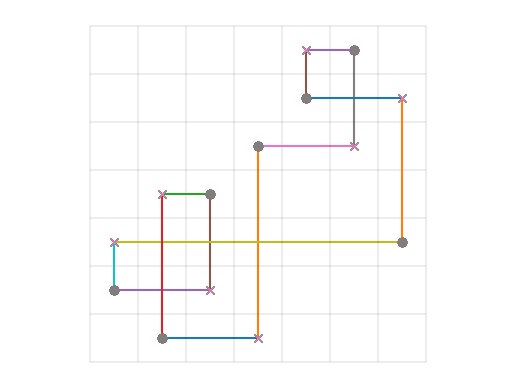

In [2]:
draw_grid(generate_random_grid(7), markings='XO')

We can create a grid diagram by specifying the position of the markings using two length N permutations; the i-th entry specifies the distance from the left of the marking in the i-th row (starting from the bottom):

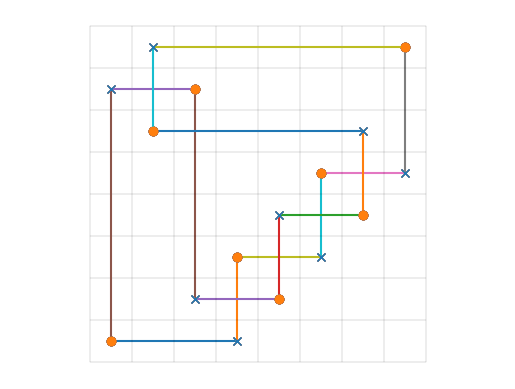

In [3]:
G = [[3, 2, 5, 4, 7, 6, 0, 1], [0, 4, 3, 6, 5, 1, 2, 7]]
draw_grid(G, markings='XO')

### Link dataset

A grid diagram can be used to represent a link (following the convention that vertical strands are always overpassing); here we see one example for the torus link $T(3,12)$, for a staircase-shaped unknot, or for the knot called $7_3$:

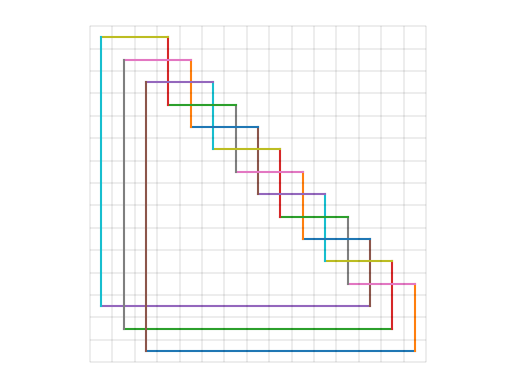

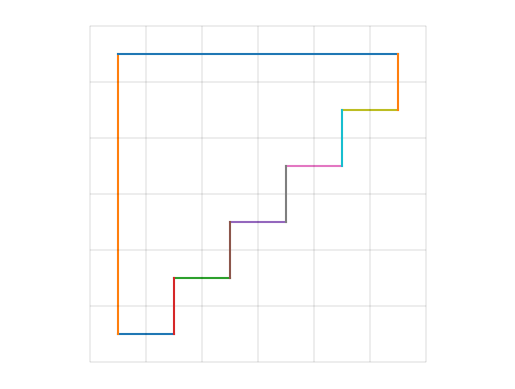

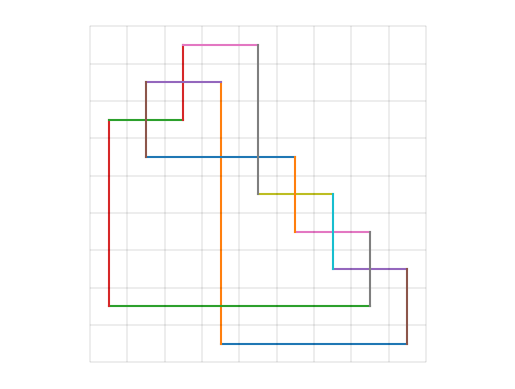

In [4]:
draw_grid(generate_torus_link(3,12))
draw_grid(generate_unknot(6)) 
draw_grid(load_knot('7_3')) 

### Cromwell moves

Two grid diagrams representing the same link are related by a finite sequence of Cromwell moves. The first kind is called stabilization, and it increases by 1 the dimension of the grid. There are 4 possible stabilizations that can be performed on each marking of the grid (these are listed in the 'stabilisation' function). 

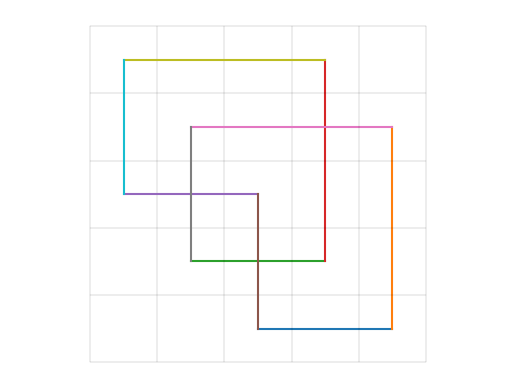

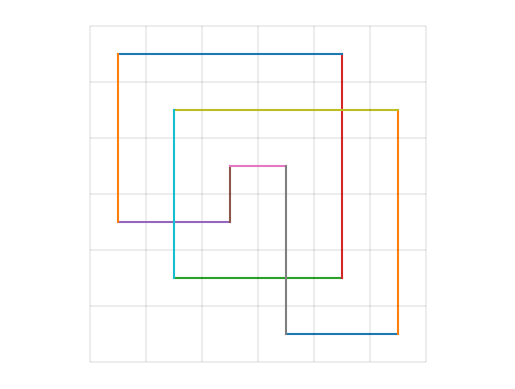

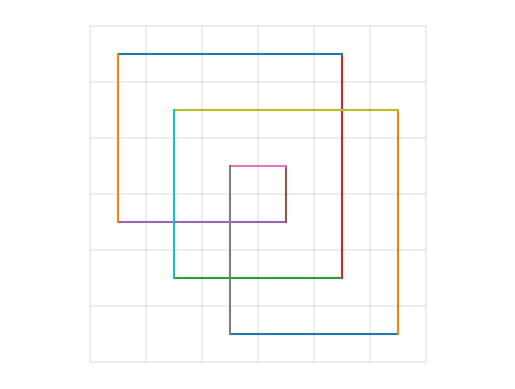

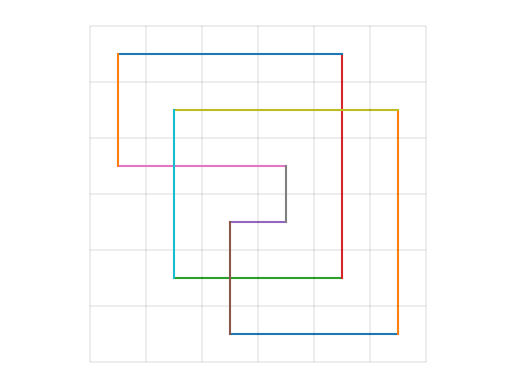

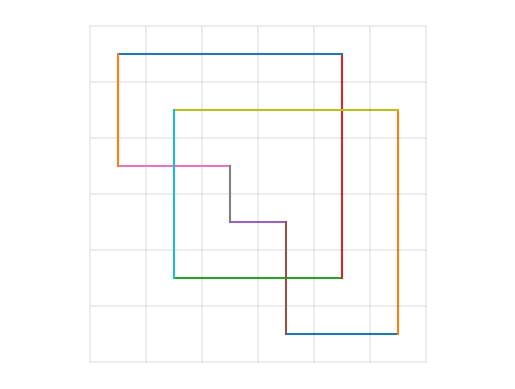

In [5]:
trefoil = generate_torus_link(3,2)
trefoil_stab1 = stabilisation(trefoil, 2, 'XSE')
trefoil_stab2 = stabilisation(trefoil, 2, 'XSW')
trefoil_stab3 = stabilisation(trefoil, 2, 'XNW')
trefoil_stab4 = stabilisation(trefoil, 2, 'XNE')
draw_grid(trefoil)
draw_grid(trefoil_stab1)
draw_grid(trefoil_stab2)
draw_grid(trefoil_stab3)
draw_grid(trefoil_stab4)

The second kind of move is called a (non-interleaving) commutation, and swaps two adjacent rows or columns whose enpoints are not interleaved:

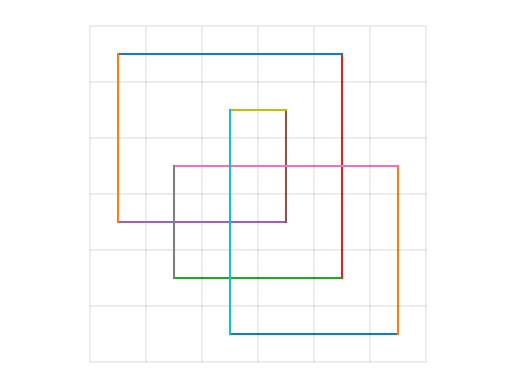

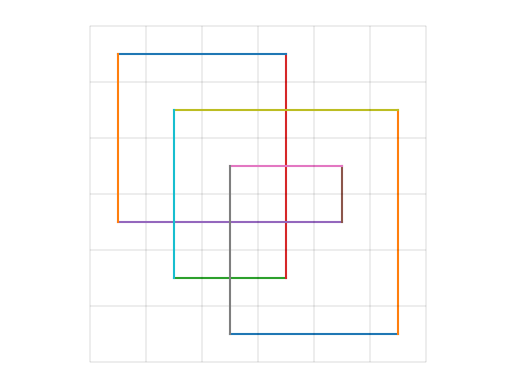

In [6]:
new_grid_row = commute_rows(trefoil_stab2, 3,interleaving = 'N')
draw_grid(new_grid_row)
new_grid_column = commute_columns(trefoil_stab2, 3,interleaving = 'N')
draw_grid(new_grid_column)

### Generate big grids

We can generate very big grids, or take a given grid and 'scramble' it, while keeping its knot type fixed:

In [ ]:
G = generate_random_grid(100)
draw_grid(G)
trefoil = generate_torus_link(3,2)
trefoil_scrambled = scramble_grid(trefoil, effort = 'low')
draw_grid(trefoil)
draw_grid(trefoil_scrambled)

### Simplify big grids


And going in the other direction, we can simplify a grid (using various strenghts of effort):

In [ ]:
G = generate_random_grid(30)
simplified_G = simplify_grid(G, effort='medium')
draw_grid(G)
draw_grid(simplified_G)

#### Monotonic simplification

In the special case of grids representing the unknot, a result by Dynnikov guarantees the existence of a winning simplification strategy!

In [ ]:
U = scramble_grid(generate_unknot(10), effort='high')
draw_grid(U)
U_simp = simplify_grid(U)
draw_grid(U_simp)

### Operations on knots

Implemented in the code, there are several standard knot theoretical operations. 

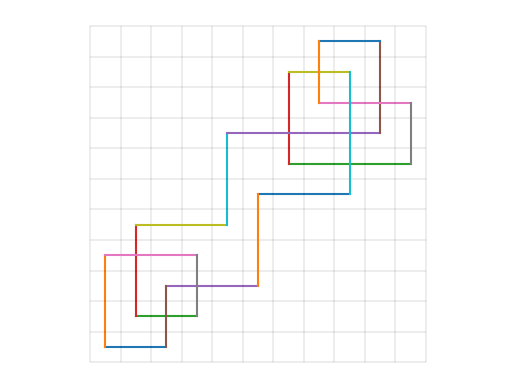

the number of crossings in this grid is: 9


In [7]:
F = mirror_grid(generate_torus_link(3,2))
H = load_knot('4_1')
conn_sum = connected_sum(F,H) 
draw_grid(conn_sum)
print('the number of crossings in this grid is:', crossing_number(conn_sum))

We can write down a braid word that represents the same link as the given grid diagram (this is convenient to compute kot invariants)

In [8]:
print('This link can be represented as the following braid word:\n\n',convert_to_braid(conn_sum))

This link can be represented as the following braid word:

 [-4, -4, -4, -3, 1, -2, 1, -2]


Other examples: a cyclic shift by 1, and 3 parallel copies of the same knot:

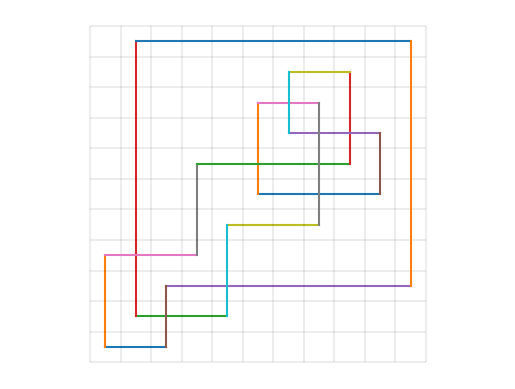

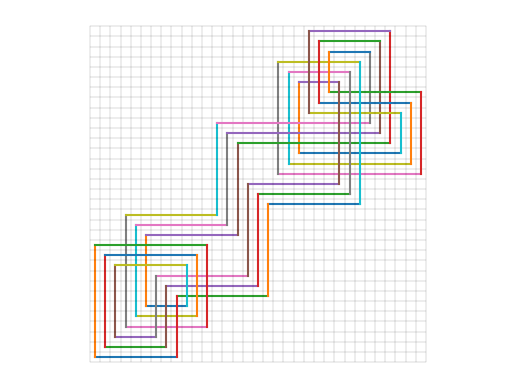

In [9]:
draw_grid(cyclic_shift(conn_sum,1))
draw_grid(parallel_copies(conn_sum,3))

### Neighbouring grids

Finally, given a grid, we can enumerate all the grids differing from it by a single commutation, stabilization or destabilization.

This is the starting grid:


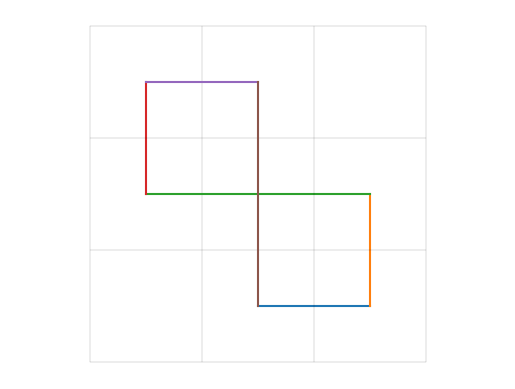

And these are all of its neighbours:


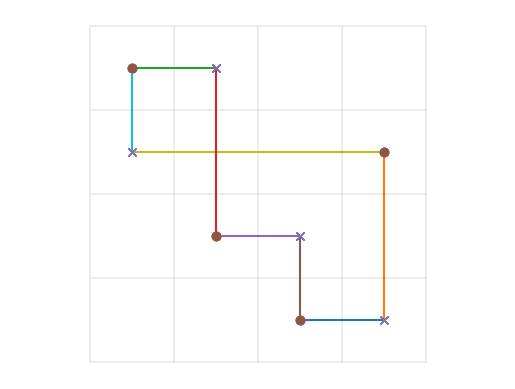

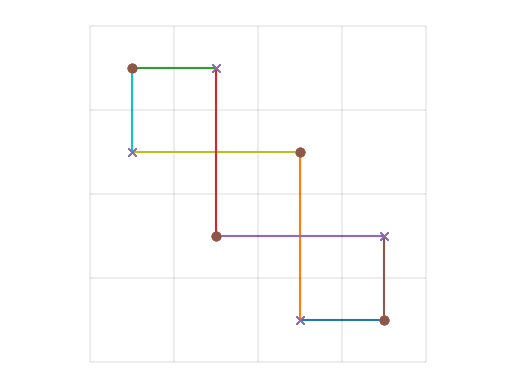

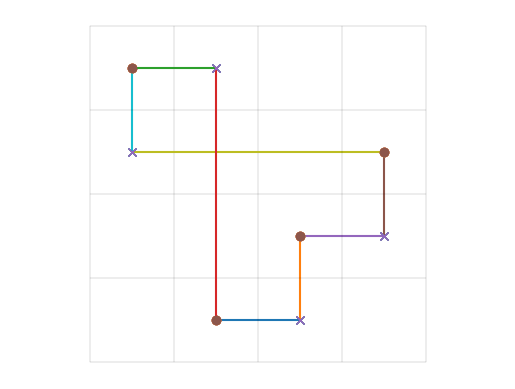

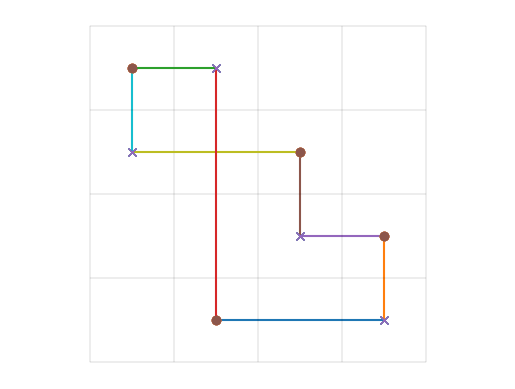

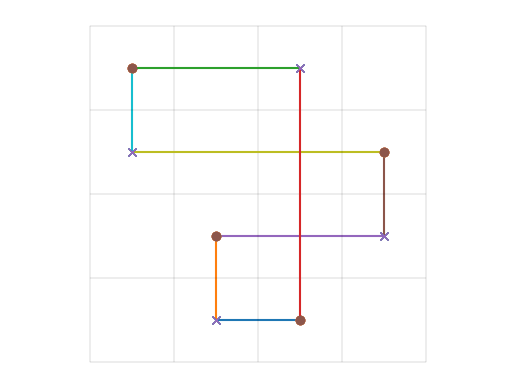

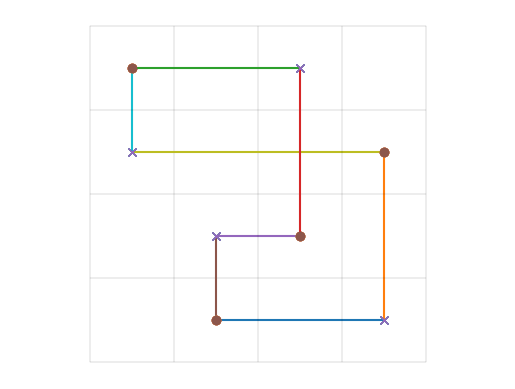

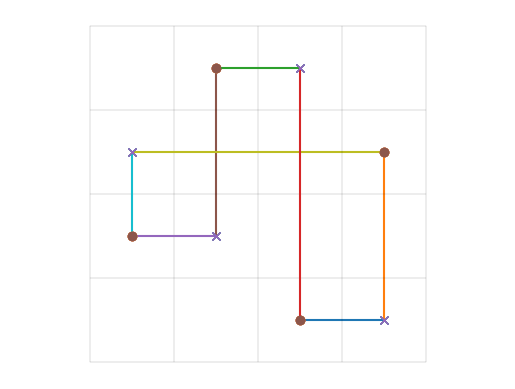

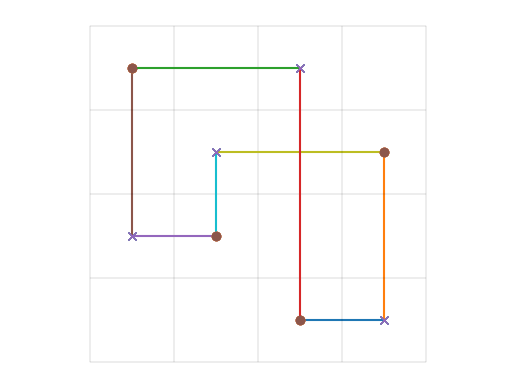

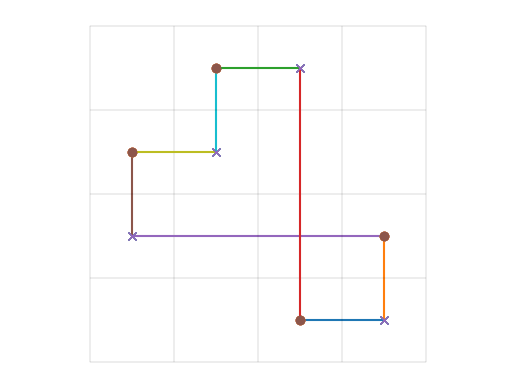

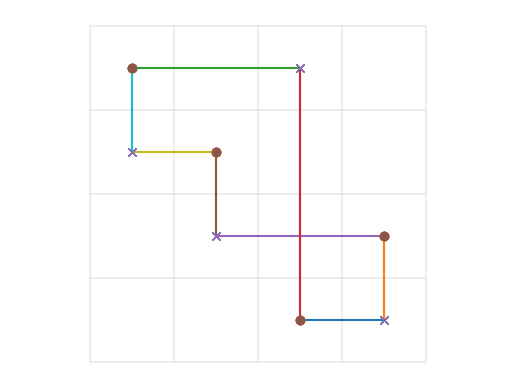

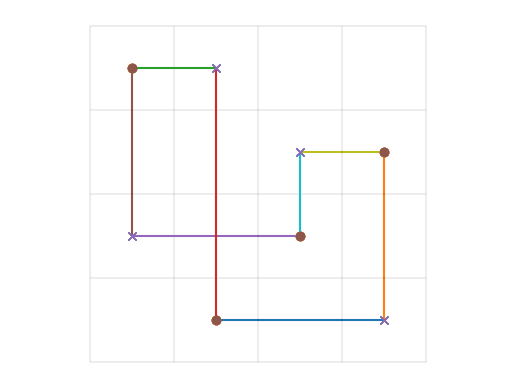

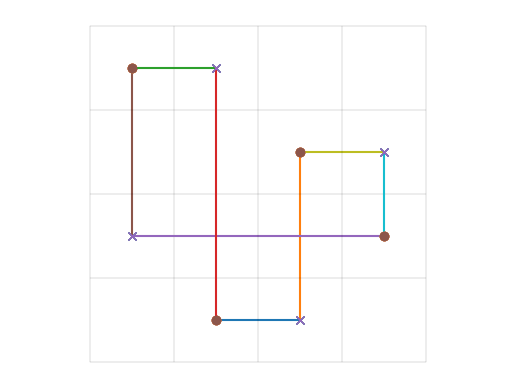

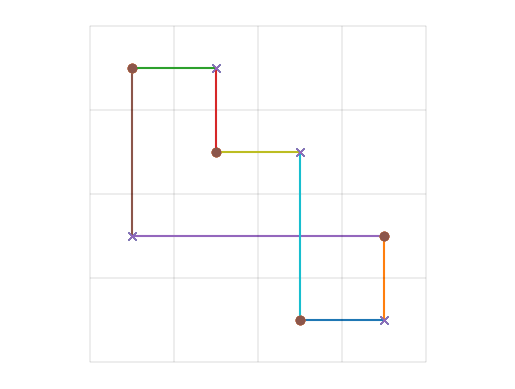

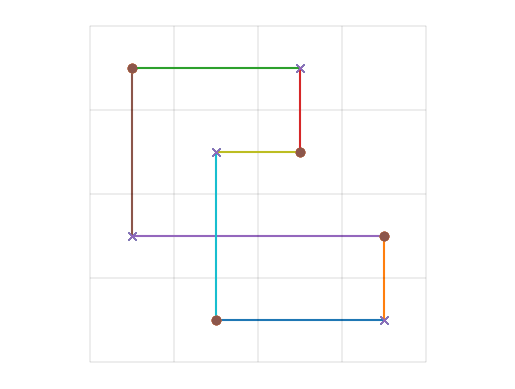

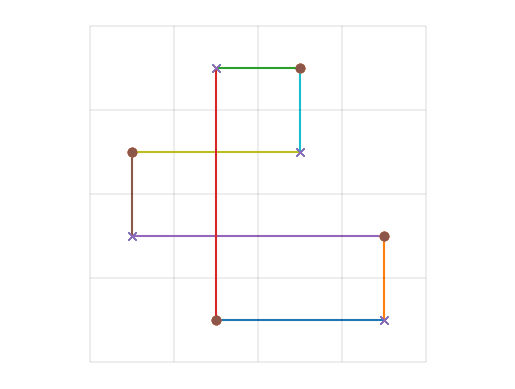

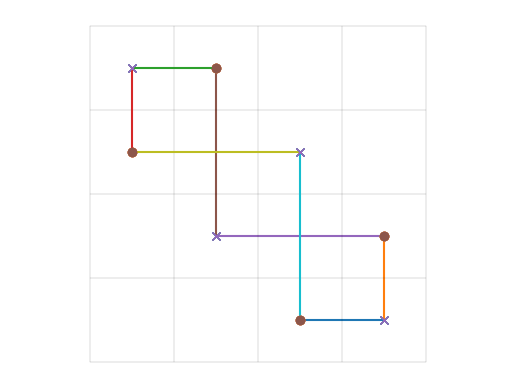

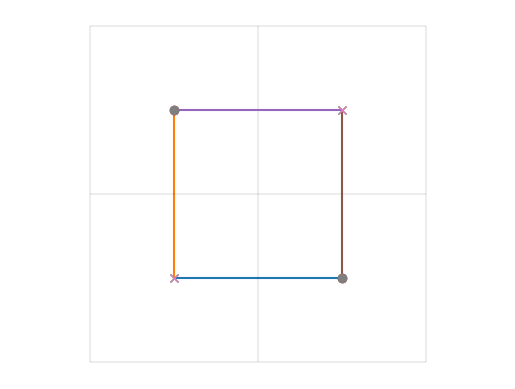

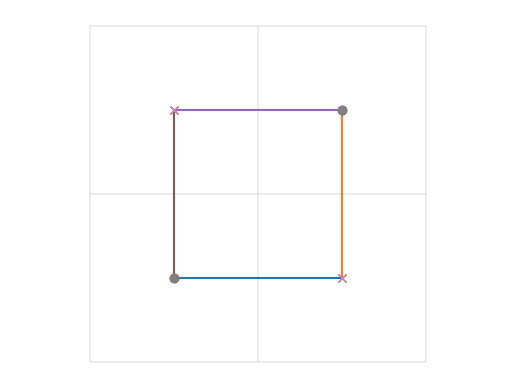

In [10]:
G = [[2, 0, 1], [1, 2, 0]]
print('This is the starting grid:')
draw_grid(G)
print('And these are all of its neighbours:')
for neig_G in perform_all_moves(G):
    draw_grid(neig_G, markings= 'XO')